# Task 4

**Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands**

In [70]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\dvr_s\Downloads\twitter_training.csv', header=None, names=["id","topic","sentiment","text"])

In [3]:
data

,id,topic,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
data.head()

,id,topic,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
data.shape

(74682, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74682 non-null  int64 
 1   topic      74682 non-null  object
 2   sentiment  74682 non-null  object
 3   text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
data.isna().sum()

id             0
topic          0
sentiment      0
text         686
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.duplicated().sum()

2340

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.duplicated().sum()

0

In [12]:
data

,id,topic,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [13]:
data.shape

(71656, 4)

In [14]:
data.reset_index(inplace=True)

In [15]:
data

,index,id,topic,sentiment,text
0,0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...,...
71651,74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
71652,74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
71653,74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
71654,74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [16]:
data.drop(columns=['index'],inplace=True)

In [17]:
data.shape

(71656, 4)

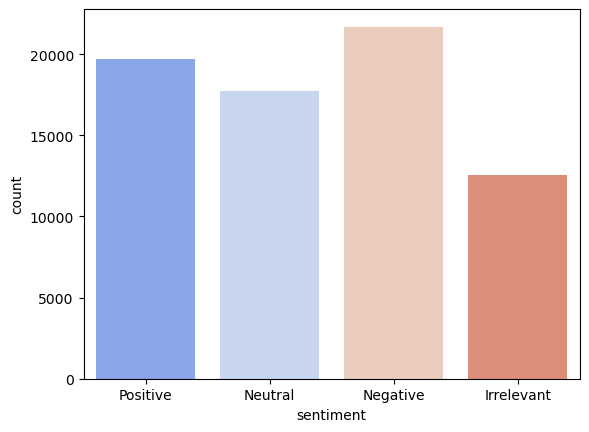

In [18]:
sns.countplot(data=data,x='sentiment',palette='coolwarm')
plt.show()

**Most topic have negative sentiment**

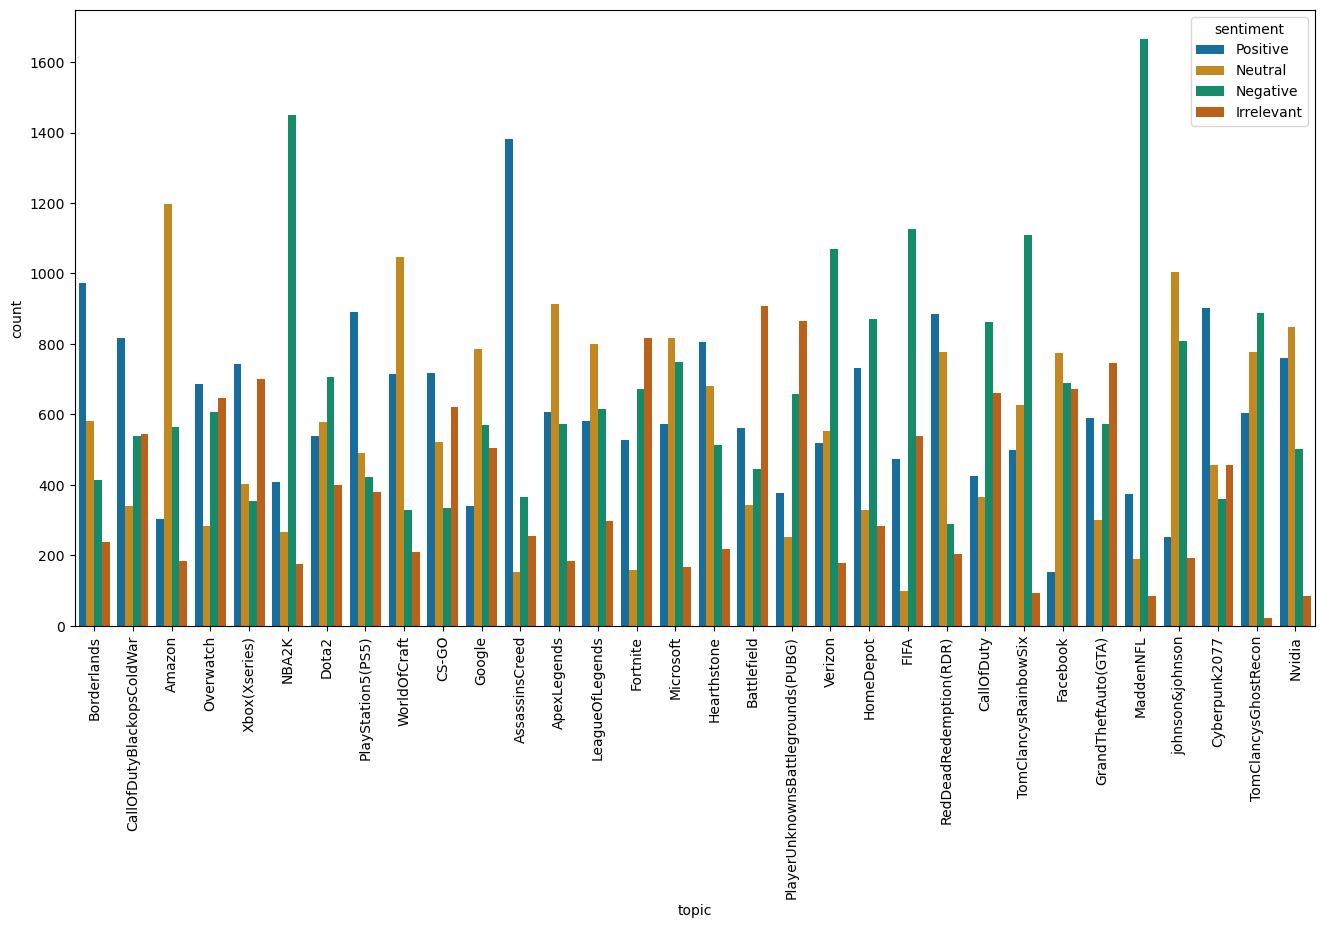

In [32]:
plt.figure(figsize=(16,8))
sns.countplot(data=data,x='topic',palette='colorblind',hue='sentiment')
plt.xticks(rotation=90)
plt.show()

In [34]:
topic_by_sentiment = data.groupby(["topic", "sentiment"]).size().reset_index(name='Count')

topic_count = data['topic'].value_counts().nlargest(6).index
top_topics_sentiment = topic_by_sentiment[topic_by_sentiment['topic'].isin(topic_count)]

# Top 5 Topics with Positive/Negative/Neutral Sentiments

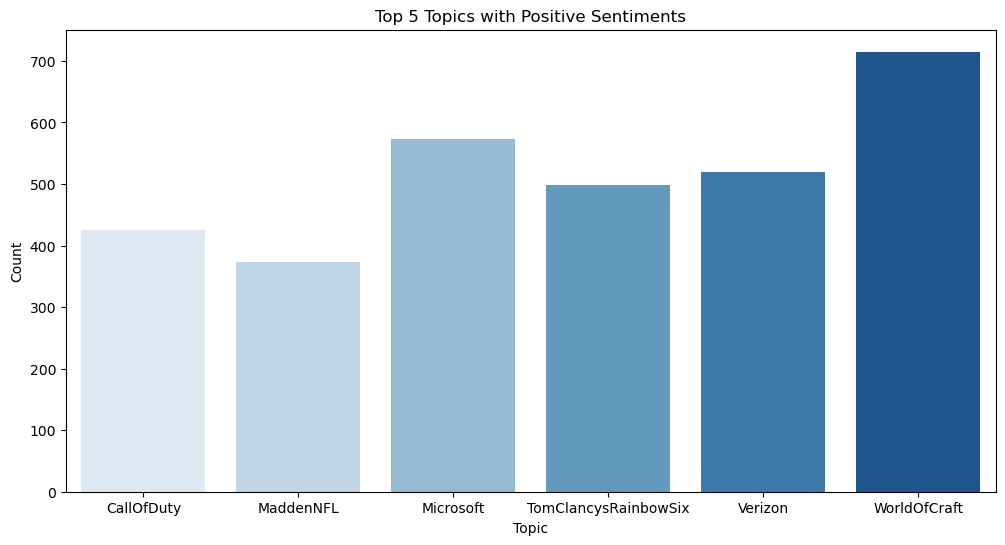

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['sentiment'] == 'Positive'], x='topic', y='Count', palette='Blues')
plt.title('Top 5 Topics with Positive Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()

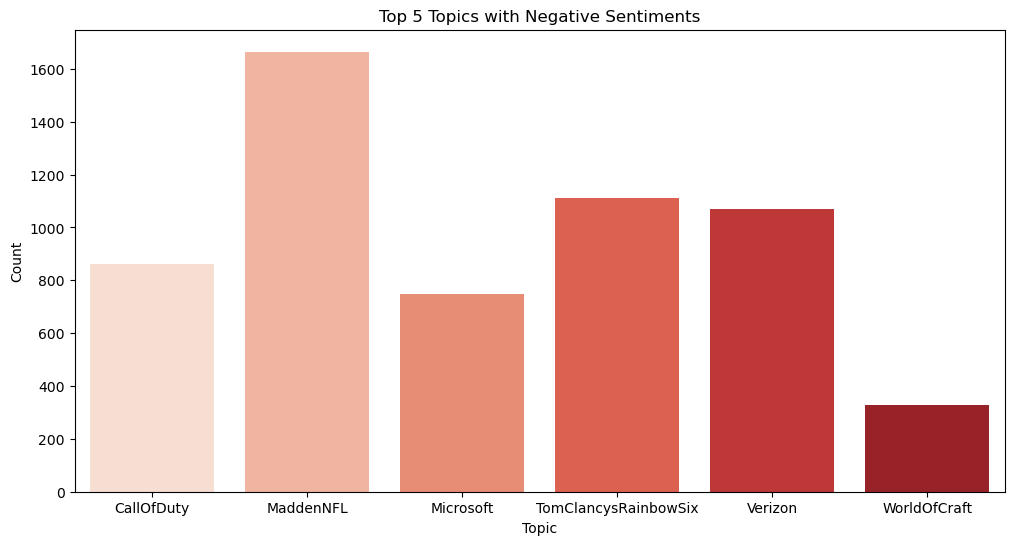

In [50]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['sentiment'] == 'Negative'], x='topic', y='Count', palette='Reds')
plt.title('Top 5 Topics with Negative Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()

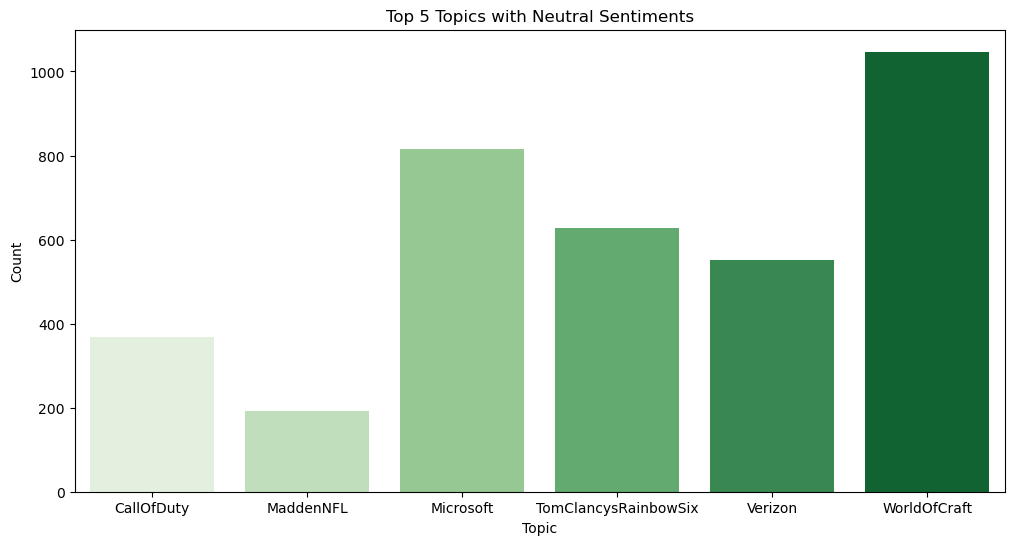

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['sentiment'] == 'Neutral'], x='topic', y='Count', palette='Greens')
plt.title('Top 5 Topics with Neutral Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()

# Top 5 topics with irrelvent sentiments

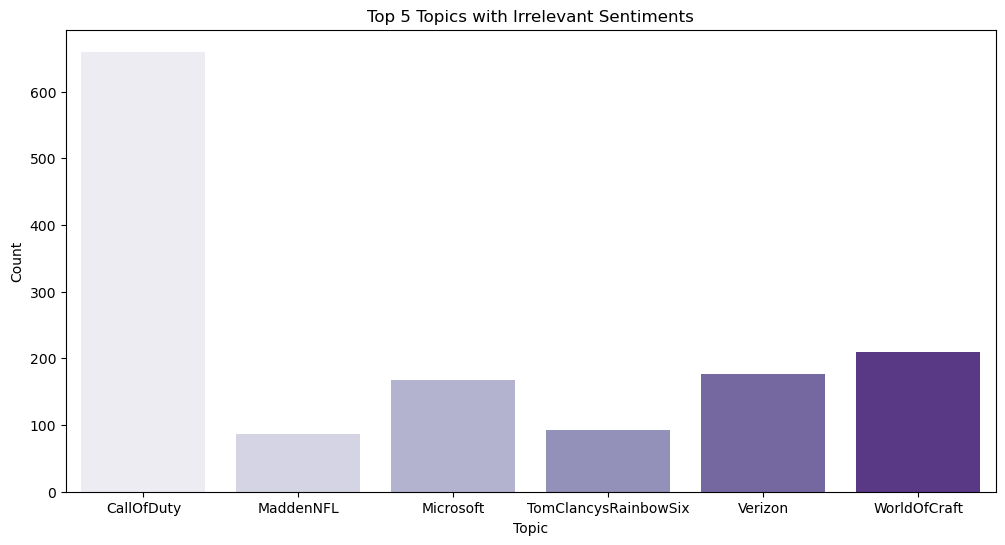

In [52]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['sentiment'] == 'Irrelevant'], x='topic', y='Count', palette='Purples')
plt.title('Top 5 Topics with Irrelevant Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()

In [54]:
data['msg_len'] = data['text'].apply(len)

In [55]:
data

,id,topic,sentiment,text,msg_len
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57
...,...,...,...,...,...
71651,9200,Nvidia,Positive,Just realized that the Windows partition of my...,128
71652,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,117
71653,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,125
71654,9200,Nvidia,Positive,Just realized between the windows partition of...,159


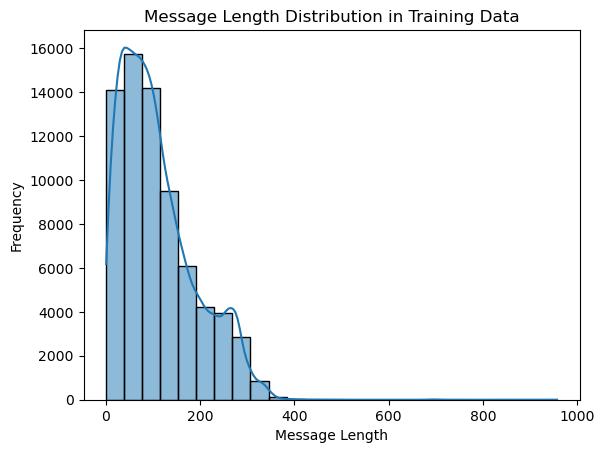

In [66]:
sns.histplot(data['msg_len'], bins=25,kde=True)
plt.title('Message Length Distribution in Training Data')
plt.ylabel('Frequency')
plt.xlabel('Message Length')
plt.show()

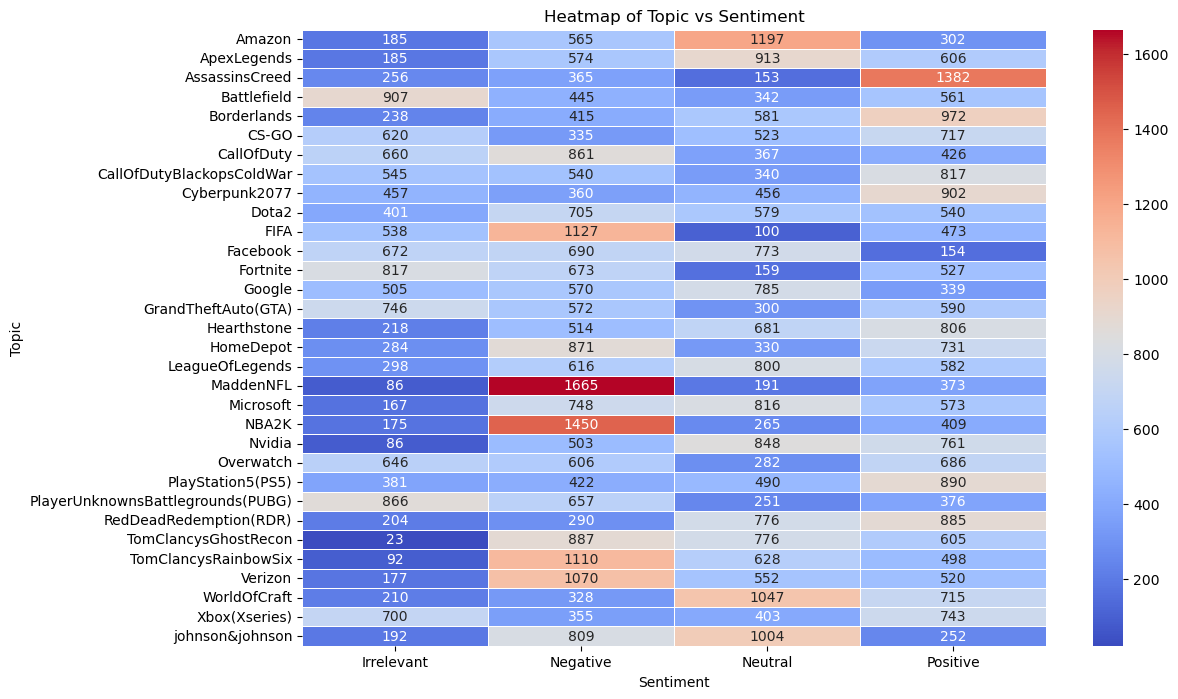

In [69]:
crosstab = pd.crosstab(index=data['topic'], columns=data['sentiment'])
plt.figure(figsize=(12, 8))  
sns.heatmap(crosstab, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)
plt.title('Heatmap of Topic vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Topic')
plt.show()

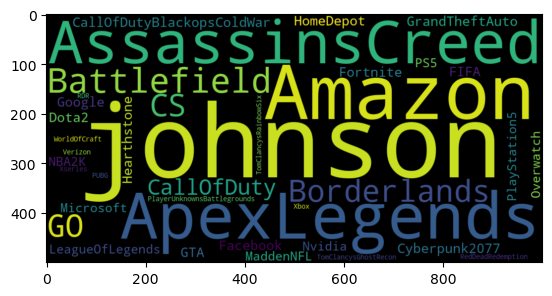

In [72]:
topic_list = ' '.join(crosstab.index)

wc = WordCloud(width=1000, height=500).generate(topic_list)

plt.imshow(wc, interpolation='bilinear')
plt.show()

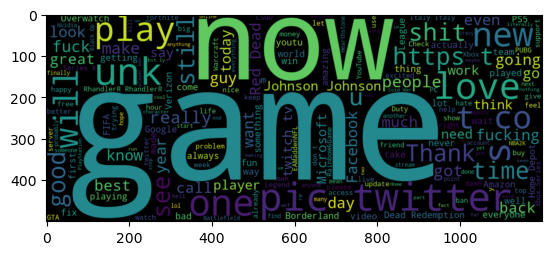

In [75]:
corpus = ' '.join(data['text'])

wc2 = WordCloud(width=1200, height=500).generate(corpus)

plt.imshow(wc2, interpolation='bilinear')
plt.show()

# Conclusion:

-  1]Most Frequent Topic: The topic "TomClancyRainbowSix" emerges as the most frequent topic of discussion among the analyzed Twitter data. This suggests a significant level of engagement or interest in this particular topic within the Twitter community.

-  2]Sentiment Distribution: The sentiment analysis reveals that the majority of topics exhibit a negative sentiment.

-  3]Message Length: Another noteworthy observation is that the majority of messages analyzed are under 400 words in length. This indicates that Twitter users tend to convey their sentiments concisely and succinctly within the platform's character limit.

In conclusion, the sentiment analysis provides valuable insights into the prevailing attitudes and opinions within the Twitter community regarding various topics. While negative sentiments appear to be more common overall, there is a diverse range of sentiments expressed across different topics.